## The Machine Learning Process:-

Credit to: `Jason Brownlee`

Instructor: `Mugume Twinamatsiko Atwine`

Prerequisite: Numpy, Pandas, Matplotlib

Duration: 2Hrs

In [1]:
#import the necessary libraries
import pandas as pd #this is for dataframe manipulation
import numpy as np #this is for numerical / mathematical computing
import matplotlib.pyplot as plt #this is for visualisation

#let's remove the annoying warnings from our cells.
import warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_29758/117552493.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd #this is for dataframe manipulation


In [20]:
# let's read in the data
data = pd.read_csv(
    "../../Data/Diabetes/diabetes.csv"
)
data.head(5) #show the top 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Dimensions of Your Data
You must have a very good handle on how much data you have, both in terms of rows and columns.

- `Data Integrity:` The first and foremost reason for checking the dimensions of data is to ensure that the data is complete and accurate. The shape of the data (number of rows and columns) can give an idea of how much data is available for analysis, and can help detect any inconsistencies or missing values in the data.

- `Data Preprocessing:` The dimensions of data are important to determine the appropriate preprocessing steps to apply before building a machine learning model. For example, if there are too many missing values or too few data points, certain data cleaning or feature engineering techniques may need to be applied to prepare the data for analysis.

- `Model Training:` The dimensions of data also impact the training of machine learning models. Machine learning models require a certain amount of data to learn and generalize patterns in the data. If the dataset is too small, the model may not learn the underlying patterns in the data, and if the dataset is too large, it may lead to overfitting. Thus, understanding the dimensions of the data is crucial for selecting an appropriate model and tuning its hyperparameters.


- `Training time estimation:`  the dimensions of data can have a significant impact on the training times of machine learning models. In general, as the size of the dataset (i.e., number of rows and columns) increases, the training time of machine learning models also increases.
This is because most machine learning algorithms require multiple passes over the data to learn the underlying patterns and relationships in the data. As the dataset size increases, the number of calculations required to process the data increases, which can result in longer training times.

In [21]:
#to check the dimensions we use the shape function from pandas
data.shape
#so we see that we have a few rows and columns so its easy to use pandas
#if not then we would use something like dask, or partition the data to
#to be read in batches

(768, 9)

## Data Types

It is important to know your data types for a couple of reasons:-

- `Data consistency:` Checking the data types ensures that the data is consistent and in the correct format. Inconsistent data types can lead to errors or incorrect predictions during model training and testing. For example, when you keep the dates they should be in one format such as "mm/dd/yyyy" if they shift around you will have errors in analysis

- `Feature engineering:` Data types can determine how features are engineered for the model. For example, categorical data requires different feature engineering methods than numerical data. You will be able to plan properly

- `Memory optimization:` Checking data types can help optimize memory usage during preprocessing, especially when dealing with large datasets. Data types can be converted to lower memory-consuming types like integers or floats.

- `Efficient data manipulation`: Different data types can require different manipulation techniques, and knowing the data types beforehand can save time and improve efficiency during data manipulation.

- `Model performance:` Checking the data types can help to identify potential issues that can affect model performance, such as non-numeric data types that require encoding or missing values that require imputation.

In [22]:
#we do that by using dtypes
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Descriptive Statistics

There are several important reasons why you would want to check the descriptive statistics of your data in a machine learning experiment. Here are some of the key reasons:

- `Identifying missing or erroneous data:` Descriptive statistics can help you identify if any of your data is missing or if there are any errors in your dataset. For example, you may notice that certain features have a lower count of non-null values than others, which could indicate missing data.

- `Understanding the distribution of your data:` Descriptive statistics can give you insights into the distribution of your data, such as the mean, median, and mode. This information can be useful for choosing the appropriate machine learning algorithms, as some algorithms work better with certain types of data distributions.

- `Detecting outliers:` Descriptive statistics can also help you detect outliers, which are data points that fall outside the expected range of values. Outliers can have a significant impact on your machine learning model's performance, so it's important to identify and handle them appropriately.

- `Assessing the quality of your data:` By examining the descriptive statistics of your data, you can get a sense of the overall quality of your dataset. For example, if you notice that some features have a large range of values compared to others, this could indicate that the data is noisy or that some features may be more important than others.

- Descriptive statistics `can give you great insight into the shape of each attribute`. Often you can create more summaries than you have time to review. The describe() function on the Pandas

DataFrame lists 8 statistical properties of each attribute. They are:

- Count.
- Mean.
- Standard Deviation.
- Minimum Value.
- 25th Percentile.
- 50th Percentile (Median).
- 75th Percentile.
- Maximum Value.


## Pandas Profiling

- This can be made easier using a library called pandasprofiling, this library helps you draw all the graphs but you will still have to make decisions on those graphs to move forward.


# Homework:
>> Does it make sense to have BloodPressure of 0 in a person as you see in the data.describe below? How would you handle it?
What methods would you use?

- Install pandasprofiling
- Use it to create an EDA (Exploratory Data Analysis Report)
- Find a way to replace the data that is 0.00 (and doesnt make sense : mean : numpy, find all 0.0 values and replace them)
- Clean your data.

In [23]:
#for this we use the describe function on the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


>> Does it make sense to have BloodPressure of 0 in a person as you see in the data.describe below? How would you handle it?
What methods would you use?

>>>> It is highly unlikely and biologically impossible for a person to have a blood pressure of 0. Therefore, having a BloodPressure value of 0 in a given dataset is most likely a result of missing or incorrect data.

>>>> To handle this issue, we can replace the 0 values with an appropriate value, such as the mean or median of the non-zero values. This approach assumes that the missing or incorrect values are randomly distributed and not biased towards any specific group or subgroup in the dataset.
>>>> After replacing the 0 values with an appropriate value, it is important to perform data validation and sanity checks to ensure the data is reasonable and consistent with domain knowledge. Additionally, it is recommended to perform exploratory data analysis and visualization to identify any other potential issues with the data.

>>>> To handle the issue of BloodPressure values being 0 in a given dataset, we can use the following methods:
- Identify the rows where the BloodPressure value is 0 using boolean indexing in pandas.
- Replace the 0 values with an appropriate value, such as the mean or median of non-zero BloodPressure values.
- Perform data validation and sanity checks to ensure the data is reasonable and consistent with domain knowledge.
- Perform exploratory data analysis and visualization to identify any other potential issues with the data.












Install pandasprofiling
- Use it to create an EDA (Exploratory Data Analysis Report)
- Find a way to replace the data that is 0.00 (and doesnt make sense : mean : numpy, find all 0.0 values and replace them)
- Clean your data.

In [25]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns


# create a copy of the original dataset with a new name
cleaned_data = data.copy()

# create an EDA report using pandasprofiling
profile = cleaned_data.profile_report()

# replace the 0 values with the mean of non-zero values in the BloodPressure column
mean_bp = cleaned_data[cleaned_data['BloodPressure'] != 0]['BloodPressure'].mean()
print(mean_bp)
cleaned_data['BloodPressure'] = cleaned_data['BloodPressure'].replace(0, mean_bp)

# clean the data by removing any duplicates and handling missing values
cleaned_data.drop_duplicates(inplace=True)
cleaned_data.dropna(inplace=True)

# save the cleaned dataset and the EDA report as a PDF file
cleaned_data.to_csv('cleaned_data.csv', index=False)
profile.to_file(output_file='eda_report.pdf')

# create a histogram of the BloodPressure values
sns.histplot(data=cleaned_data, x='BloodPressure', kde=True)


PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.6/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.6/u/import-error

In [26]:
#- create a mask
#- use the mask to split the data
mask = data.BMI==0

data[mask==True]
# replace these with the mean.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


## Label Distribution (Classiffication Only)

Why would someone check the label distribution in an ML/AI experiment?

- `Class imbalance:` In some datasets, one class may be significantly more prevalent than the others. This can lead to a class imbalance problem, where the model is biased towards the majority class and performs poorly on the minority class. Checking the label distribution can help identify if there is a class imbalance problem in the data.

- `Model performance:` The label distribution can impact the model's performance. If the model is trained on a dataset with a skewed label distribution, it may not generalize well to unseen data. Checking the label distribution can help ensure that the model is trained on a representative sample of the data.

- `Data preprocessing:` Depending on the label distribution, different preprocessing techniques may be needed. For example, in a dataset with imbalanced labels, oversampling or undersampling techniques may be needed to balance the classes. Checking the label distribution can help determine what preprocessing techniques are needed.

- `Data collection:` The label distribution can provide insights into the data collection process. For example, if a certain label is overrepresented, it may indicate that the data was collected in a biased way. Checking the label distribution can help identify potential biases in the data collection process.

- `Domain knowledge:` Checking the label distribution can help provide insights into the problem domain. For example, if a certain label is underrepresented, it may indicate that the problem is rare or difficult to identify. Checking the label distribution can help the modeler understand the problem domain better.

<Axes: xlabel='Outcome'>

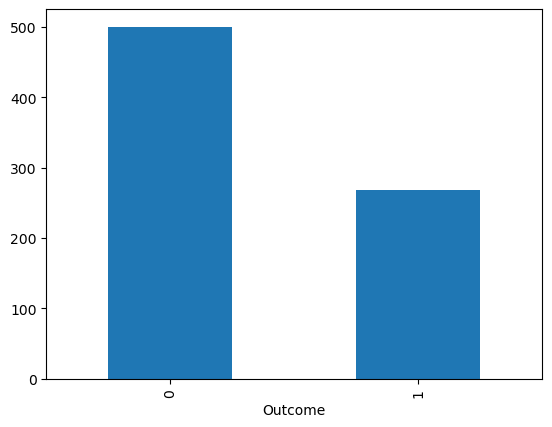

In [27]:
#this is the distribution of the class
#this only works if we are working with a classification problem not regression
#in this case we would have to use methods like smote to deal with the imbalance
data.groupby('Outcome').size().plot(kind='bar')


## Correlation

Correlation refers to the relationship between two variables and how they may or may not change together. The most common method for calculating correlation is Pearson's Correlation Coefficient, that assumes a normal distribution of the attributes involved. 

`A correlation of -1 or 1 shows a full negative or positive correlation respectively.` 

Whereas a value of 0 shows no correlation at all. Some machine learning algorithms like linear and logistic regression can suffer poor performance if there are highly correlated attributes in your dataset. `It is important to know the assumptions of the model you are using before using it`

---

### Model Assumptions:

The supporting reasons for checking the assumptions of a model in an ML experiment, and how it affects how you handle data in the case of a linear regression model.

- `Ensures validity of results:` Checking the assumptions of a linear regression model ensures the validity of the results. If the assumptions are not met, the results obtained from the model may not be reliable or valid. For example, if the assumption of linearity is not met, the results obtained from the model may not accurately reflect the relationship between the dependent and independent variables.

- `Helps in selecting appropriate variables:` Checking the assumptions of a linear regression model helps in selecting appropriate variables for the model. For example, if the assumption of normality is not met, it may indicate that some variables may not be appropriate for the model or may need to be transformed.

- `Improves model accuracy:` Checking the assumptions of a linear regression model can help in improving the accuracy of the model. For example, if the assumption of homoscedasticity is not met, it may indicate that the model needs to be transformed or that a different model may be more appropriate.

- `Guides data preparation:` Checking the assumptions of a linear regression model guides data preparation. For example, if the assumption of independence is not met, it may indicate that the data needs to be collected differently or that some observations need to be excluded from the analysis.

- `Provides insights into underlying data:` Checking the assumptions of a linear regression model provides insights into the underlying data. For example, if the assumption of normality is not met, it may indicate that there are outliers or that the data is skewed.

#### `Comparison of Assumptions between Linear Regression and Logistic Regression`
---

`Assumptions of Linear Regression Model:`

- Linearity: The relationship between the dependent variable and independent variable is linear.
- Independence: The observations are independent of each other.
- Homoscedasticity: The variance of the errors is constant across all levels of the independent variable.
- Normality: The errors follow a normal distribution.
- No multicollinearity: There is no high correlation among the independent variables.

`Assumptions of Logistic Regression Model:`

- Linearity of the logit: The relationship between the independent variable and the logit of the dependent variable is linear.
- Independence: The observations are independent of each other.
- No multicollinearity: There is no high correlation among the independent variables.
- Large sample size: There are a sufficient number of observations for each combination of the independent variables.
- No outliers: There are no extreme observations that can influence the results.

---

As such, it is a good idea to review all of the pairwise correlations of the attributes in your dataset. You can use the corr() function on the Pandas DataFrame to calculate a correlation matrix.

There are several reasons why one would consider the correlation between variables while doing machine learning:

- `Identify redundant features:` Correlated features can be redundant and provide similar information. Including highly correlated features in a model can lead to overfitting and decrease the model's performance. Identifying and removing these features can help reduce the complexity of the model and improve its accuracy.

>> Suppose you are building a model to predict the price of a house based on its size, number of bedrooms, number of bathrooms, and location. The number of bedrooms and number of bathrooms are highly correlated, and including both features in the model can lead to overfitting. By identifying the correlation between these two features and removing one of them, we can reduce the complexity of the model.

- `Improve model interpretability:` Understanding the correlation between variables can help to explain the relationships between the features and the target variable. This understanding can improve the interpretability of the model and help to identify important features that contribute most to the prediction.

>> Consider a model that predicts whether a customer will buy a product based on their age, income, and education level. By analyzing the correlation between these features and the target variable, we can determine that income has the strongest correlation with the target variable. This understanding can help to explain why income is a critical factor in determining whether a customer buys a product, and improve the interpretability of the model.

- `Data preprocessing:` Correlation analysis can be used to identify and remove outliers and missing values in the dataset. This process can help to improve the quality of the data and the model's performance.

>> Suppose you are building a model to predict the likelihood of a customer to churn (i.e., leave) a subscription-based service. The dataset includes missing values and outliers, which can affect the quality of the data and the model's performance. By analyzing the correlation between the features and the target variable, we can identify and remove outliers and fill in missing values, which can help to improve the quality of the data and the model's performance.

- `Feature engineering:` Correlation analysis can help in creating new features that can improve the model's performance. For example, we can create a new feature by combining highly correlated features or by performing operations on correlated features to create a new feature that is more predictive.

>> Consider a model that predicts whether a student will pass a test based on their study hours, attendance rate, and average grade. By analyzing the correlation between these features, we can create a new feature by multiplying the study hours and attendance rate, which are highly correlated. This new feature can be more predictive than either feature alone, and can help to improve the model's performance.

In [28]:
data.corr(method='pearson')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [29]:
#let us plot a heat map to show us the correlation of the data
import seaborn as sns

<Axes: >

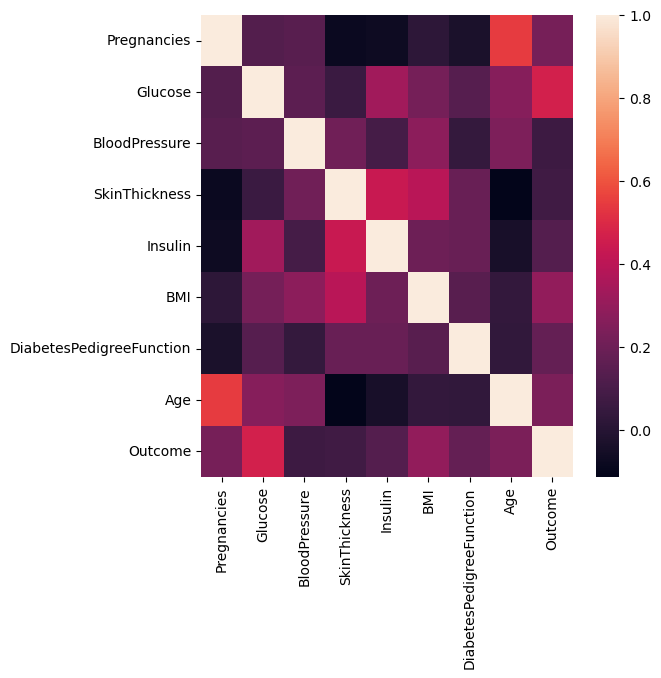

In [30]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(method='pearson'))

### Note: Feature and Label Correlation
`Feature selection:` Correlation analysis can help identify which variables are strongly correlated with the label and, therefore, are potentially good features for use in the model. Feature selection is important to prevent overfitting and improve the accuracy of the model.

In [31]:
#we can also check the correlation in regards to the outcome
#this is valuable especially when we are trying to build an ML algo for that outcome
data.corr(method='pearson')['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

# Prepare Your Data For Machine Learning

Many machine learning algorithms make assumptions about your data. It is often a very good
idea to prepare your data in such way to best expose the structure of the problem to the machine
learning algorithms that you intend to use. In this chapter you will discover how to prepare
your data for machine learning in Python using scikit-learn. After completing this lesson you
will know how to:

1. Rescale data.
2. Standardize data.
3. Normalize data.
4. Binarize data.


### Need For Data Pre-processing
You almost always need to pre-process your data. It is a required step. A difficulty is that
different algorithms make different assumptions about your data and may require different
transforms. Further, when you follow all of the rules and prepare your data, sometimes algorithms
can deliver better results without pre-processing.
Generally, I would recommend creating many different views and transforms of your data,
then exercise a handful of algorithms on each view of your dataset. This will help you to 
ush
out which data transforms might be better at exposing the structure of your problem in general.

The steps involved are as below:

- Split the dataset into the input and output variables for machine learning.
- Apply a pre-processing transform to the input variables.
- Summarize the data to show the change.

The scikit-learn library provides two standard idioms for transforming data. Each are useful
in different circumstances. The transforms are calculated in such a way that they can be applied
to your training data and any samples of data you may have in the future. The scikit-learn
documentation has some information on how to use various different pre-processing methods:

The Fit and Multiple Transform method is the preferred approach. You call the fit()
function to prepare the parameters of the transform once on your data. Then later you can use
the transform() function on the same data to prepare it for modeling and again on the test or
validation dataset or new data that you may see in the future. The Combined Fit-And-Transform
is a convenience that you can use for one of the tasks. This might be useful if you are interested
in plotting or summarizing the transformed data.


## Rescale Data

In machine learning, `rescaling refers to the process of transforming the values of a variable to a new scale`, typically to a specific range or distribution. Rescaling is often used as a data preprocessing step to prepare the data for use in a machine learning model.

Rescaling can be achieved using various techniques, including normalization and standardization, as well as other methods such as `min-max scaling` and `log transformation`. The choice of rescaling technique depends on the nature of the data and the specific requirements of the model.

Rescaling is important in machine learning because it can help to improve the performance of the model by reducing the impact of features that have large values or different scales. Rescaling can also help to simplify the interpretation of the model by making the features more comparable and understandable.

- `Avoiding numerical instability:` In some machine learning algorithms, such as gradient-based optimization algorithms, the scale of the input features can affect the convergence of the algorithm. Rescaling the data can help avoid numerical instability and improve the convergence of the algorithm.

- `Improving performance:` Rescaling the data can improve the performance of the model, especially when using distance-based algorithms or when the features have different scales. In distance-based algorithms, the distance between two data points is affected by the scale of the features, so rescaling the data can make the distance more meaningful. Similarly, when the features have different scales, rescaling can help give equal importance to all features.

- `Reducing computational complexity:` Rescaling the data can reduce the computational complexity of some machine learning algorithms, such as support vector machines. When the features have different scales, some algorithms may require more computation to converge, and rescaling can help reduce this complexity.

- `Normalization:` As mentioned in the previous answer, rescaling can be used for normalization, which is a technique used to rescale data to a specific range, typically between 0 and 1. Normalization can help in comparing variables that have different units or scales or when we want to give more importance to small values.


In [33]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = data.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


## Standardize Data
Standardization is a useful technique to transform attributes with a Gaussian distribution and
differing means and standard deviations to a standard Gaussian distribution with a mean of
0 and a standard deviation of 1. 

`Standardization`, also known as `z-score normalization`, is a technique used to `transform data so that it has zero mean and unit variance`. This is achieved by `subtracting the mean of the data and dividing by its standard deviation.` The resulting transformed data has `a mean of 0` and a `standard deviation of 1`. Standardization is often used when the distribution of the data is approximately normal or when we want to give equal importance to all features.

__`It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as linear regression, logistic regression and linear discriminate analysis.`__ 

Example in Skearn

In [35]:
from sklearn.preprocessing import StandardScaler

array2 = data.values
# separate array into input and output components
X = array2[:,0:8]
Y = array2[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


## Normalize Data
Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called
a unit norm or a vector with the length of 1 in linear algebra).

`Normalization`, on the other hand, is `a technique used to rescale data to a specific range, typically between 0 and 1.` This is achieved by `subtracting the minimum value of the data and dividing by the range` (i.e., the difference between the maximum and minimum values). Normalization is often used when we want to compare variables that have different units or scales or when we want to give more importance to small values.

__`This pre-processing method can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as neural networks and algorithms that use distance measures such as k-Nearest Neighbors.`__ 

Example in Skearn

In [36]:
from sklearn.preprocessing import Normalizer

array3 = data.values
# separate array into input and output components
X = array3[:,0:8]
Y = array3[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])
print(type(normalizedX))#print the data type so we can know what we are 
#working with in the dataset.

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]
<class 'numpy.ndarray'>


### Algorithm Spot-Checking

Algorithm spot-checking is a process in machine learning where multiple algorithms are tested and compared on a specific dataset to identify the one that performs the best for a given task. It involves evaluating the performance of various algorithms using a set of standard evaluation metrics, such as accuracy, precision, recall, F1 score, and ROC-AUC score, among others. The goal of algorithm spot-checking is to find the best algorithm that can accurately model the underlying pattern in the data and generalize well to new, unseen data. By trying out multiple algorithms and comparing their performance, algorithm spot-checking helps data scientists and machine learning practitioners to identify the best algorithm for their specific task and improve the overall performance of their models.

- `Determine the Best Algorithm:` Spot-checking allows you to compare the performance of multiple algorithms on the same dataset and select the best one for your specific task. Different algorithms are suited to different types of problems, and spot-checking helps you find the one that performs the best on your data.

- `Save Time:` Trying out multiple algorithms manually can be time-consuming and inefficient. With algorithm spot-checking, you can automate the process of testing different models, which can save you time and effort.

- `Improve Accuracy:` By testing multiple algorithms and comparing their performance, you can improve the accuracy of your model. This is because different algorithms have different strengths and weaknesses, and by choosing the best one for your task, you can improve the overall accuracy of your model.

- `Reduce Overfitting:` Overfitting occurs when a model is too complex and captures noise instead of the underlying pattern in the data. By comparing the performance of multiple algorithms, you can identify the one that is less prone to overfitting and select it for your model.

- `Gain Insights:` Algorithm spot-checking can also provide valuable insights into the characteristics of your data. By analyzing the performance of different algorithms, you can gain a better understanding of the patterns and relationships within your data, which can help you develop better models in the future.



#### Algorithms Overview
We are going to take a look at six classification algorithms that you can spot-check on your
dataset. Starting with two linear machine learning algorithms:
- Logistic Regression.
- Linear Discriminant Analysis.
- Naive Bayes.

Then looking at four nonlinear machine learning algorithms:
- k-Nearest Neighbors.
- Classification and Regression Trees.
- Support Vector Machines.

### Linear Machine Learning Algorithms
This section demonstrates minimal recipes for how to use two linear machine learning algorithms:
`logistic regression` and `linear discriminant analysis`.

#### Logistic Regression

In [38]:
# Logistic Regression Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array = data.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

#### Linear Discriminant Analysis

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
array = data.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.773462064251538


## Nonlinear Machine Learning Algorithms

### k-Nearest Neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier

array = data.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7265550239234451


## Classiffication and Regression Trees


In [43]:
from sklearn.tree import DecisionTreeClassifier
array = data.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6900205058099795


## Support Vector Machines

In [44]:
from sklearn.svm import SVC

array = data.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6510252904989747


# Spot-Check Regression Algorithms

- Linear Regression.
- Ridge Regression.
- LASSO Linear Regression.
- Elastic Net Regression.

Then looking at three nonlinear machine learning algorithms:
- k-Nearest Neighbors.
- Classification and Regression Trees.
- Support Vector Machines.

### Linear Regression
Linear regression assumes that the input variables have a Gaussian distribution. It is also
assumed that input variables are relevant to the output variable and that they are not highly
correlated with each other (a problem called collinearity). You can construct a linear regression
model using the LinearRegression class.

In [45]:
from sklearn.linear_model import LinearRegression
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.705255944524865


### Ridge Regression
Ridge regression is an extension of linear regression where the loss function is modified to
minimize the complexity of the model measured as the sum squared value of the coefficient
values (also called the L2-norm). You can construct a ridge regression model by using the Ridge
class2.

In [46]:
from sklearn.linear_model import Ridge
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = Ridge()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.078246209259305


# Nonlinear Machine Learning Algorithms
This section provides examples of how to use three di

erent nonlinear machine learning algorithms
for regression in Python with scikit-learn.

### K-Nearest Neighbors
The k-Nearest Neighbors algorithm (or KNN) locates the k most similar instances in the
training dataset for a new data instance. From the k neighbors, a mean or median output
variable is taken as the prediction. Of note is the distance metric used (the metric argument).
The Minkowski distance is used by default, which is a generalization of both the Euclidean
distance (used when all inputs have the same scale) and Manhattan distance (for when the
scales of the input variables di

er). You can construct a KNN model for regression using the
KNeighborsRegressor class5.

In [47]:
from sklearn.neighbors import KNeighborsRegressor
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-107.28683898039215


# Compare Machine Learning Algorithms
It is important to compare the performance of multiple di

erent machine learning algorithms
consistently. In this chapter you will discover how you can create a test harness to compare
multiple different machine learning algorithms in Python with scikit-learn. You can use this
test harness as a template on your own machine learning problems and add more and different
algorithms to compare. After completing this lesson you will know:

1. How to formulate an experiment to directly compare machine learning algorithms.
2. A reusable template for evaluating the performance of multiple algorithms on one dataset.
3. How to report and visualize the results when comparing algorithm performance.


### Choose The Best Machine Learning Model
When you work on a machine learning project, you often end up with multiple good models
to choose from. Each model will have different performance characteristics. Using resampling
methods like cross validation, you can get an estimate for how accurate each model may be on
unseen data. You need to be able to use these estimates to choose one or two best models from
the suite of models that you have created.
When you have a new dataset, it is a good idea to visualize the data using different techniques
in order to look at the data from di

erent perspectives. The same idea applies to model selection.
You should use a number of di

erent ways of looking at the estimated accuracy of your machine
learning algorithms in order to choose the one or two algorithm to finalize. A way to do this is
to use visualization methods to show the average accuracy, variance and other properties of the
distribution of model accuracies. In the next section you will discover exactly how you can do
that in Python with scikit-learn.


### Compare Machine Learning Algorithms Consistently
The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is
evaluated in the same way on the same data. You can achieve this by forcing each algorithm to be evaluated on a consistent test harness. In the example below six different classiffication
algorithms are compared on a single dataset:

- Logistic Regression.
- Linear Discriminant Analysis.
- k-Nearest Neighbors.
- Classiffication and Regression Trees.
- Naive Bayes.
- Support Vector Machines.

The dataset is the Pima Indians onset of diabetes problem. The problem has two classes and
eight numeric input variables of varying scales. The 10-fold cross validation procedure is used to
evaluate each algorithm, importantly con

gured with the same random seed to ensure that the
same splits to the training data are performed and that each algorithm is evaluated in precisely
the same way. Each algorithm is given a short name, useful for summarizing results afterward.

In [ ]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
# from sklearn.ensemble import AdaBoostClassifier
filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values

#split the dataset 
X = array[:,0:8]
Y = array[:,8]

# prepare models and add them to a list
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# models.append(('ADA', AdaBoostClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

From these results, it would suggest that both logistic regression and linear discriminant analysis are perhaps worthy of further study on this problem.

# Automate Machine Learning Workflows with Pipelines
---

<img src="https://www.wordstream.com/wp-content/uploads/2021/07/machine-learning.png">

---

There are standard workflows in a machine learning project that can be automated. In Python
scikit-learn, Pipelines help to clearly define and automate these work
ows. In this chapter you will discover Pipelines in scikit-learn and how you can automate common machine learning
work
ows. After completing this lesson you will know:

1. How to use pipelines to minimize data leakage.
2. How to construct a data preparation and modeling pipeline.
3. How to construct a feature extraction and modeling pipeline.

### Automating Machine Learning Workflows
There are standard work
ows in applied machine learning. Standard because they overcome
common problems like data leakage in your test harness. Python scikit-learn provides a Pipeline
utility to help automate machine learning work
ows. Pipelines work by allowing for a linear
sequence of data transforms to be chained together culminating in a modeling process that can
be evaluated.

The goal is to ensure that all of the steps in the pipeline are constrained to the data available
for the evaluation, such as the training dataset or each fold of the cross validation procedure.

### Data Preparation and Modeling Pipeline
An easy trap to fall into in applied machine learning is leaking data from your training dataset
to your test dataset. To avoid this trap you need a robust test harness with strong separation of training and testing. This includes data preparation. Data preparation is one easy way to leak
knowledge of the whole training dataset to the algorithm. For example, preparing your data
using normalization or standardization on the entire training dataset before learning would not
be a valid test because the training dataset would have been in
uenced by the scale of the data
in the test set.


Pipelines help you prevent data leakage in your test harness by ensuring that data preparation
like standardization is constrained to each fold of your cross validation procedure. The example
below demonstrates this important data preparation and model evaluation work
ow on the Pima Indians onset of diabetes dataset. The pipeline is defined with two steps:

1. Standardize the data.
2. Learn a Linear Discriminant Analysis model.

The pipeline is then evaluated using 10-fold cross validation.

In [49]:
# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# load data

dataframe = read_csv('diabetes.csv')
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)


# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.773462064251538


Notice how we create a Python list of steps that are provided to the Pipeline for process
the data. Also notice how the Pipeline itself is treated like an estimator and is evaluated in its
entirety by the k-fold cross validation procedure. Running the example provides a summary of
accuracy of the setup on the dataset.


## Feature Extraction and Modeling Pipeline
Feature extraction is another procedure that is susceptible to data leakage. Like data preparation,
feature extraction procedures must be restricted to the data in your training dataset. The
pipeline provides a handy tool called the FeatureUnion which allows the results of multiple
feature selection and extraction procedures to be combined into a larger dataset on which a
model can be trained. Importantly, all the feature extraction and the feature union occurs
within each fold of the cross validation procedure. The example below demonstrates the pipeline
defined with four steps:

1. Feature Extraction with Principal Component Analysis (3 features).
2. Feature Extraction with Statistical Selection (6 features).
3. Feature Union.
4. Learn a Logistic Regression Model.

The pipeline is then evaluated using 10-fold cross validation.

In [50]:
# Create a pipeline that extracts features from the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
# load data
filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7760423786739576


# Improve Performance with Ensembles

Ensembles can give you a boost in accuracy on your dataset. In this chapter you will discover
how you can create some of the most powerful types of ensembles in Python using scikit-learn.
This lesson will step you through Boosting, Bagging and Majority Voting and show you how you
can continue to ratchet up the accuracy of the models on your own datasets. After completing
this lesson you will know:

1. How to use bagging ensemble methods such as bagged decision trees, random forest and extra trees.
2. How to use boosting ensemble methods such as AdaBoost and stochastic gradient boosting.
3. How to use voting ensemble methods to combine the predictions from multiple algorithms.

### Combine Models Into Ensemble Predictions
The three most popular methods for combining the predictions from different models are:

- Bagging. Building multiple models (typically of the same type) from different subsamples of the training dataset.
- Boosting. Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the sequence of models.
- Voting. Building multiple models (typically of di

ering types) and simple statistics (like calculating the mean) are used to combine predictions.

This assumes you are generally familiar with machine learning algorithms and ensemble
methods and will not go into the details of how the algorithms work or their parameters.
The Pima Indians onset of Diabetes dataset is used to demonstrate each algorithm. Each
ensemble algorithm is demonstrated using 10-fold cross validation and the classiffication accuracy
performance metric.


### Bagging Algorithms
Bootstrap Aggregation (or Bagging) involves taking multiple samples from your training dataset
(with replacement) and training a model for each sample. The 

nal output prediction is averaged
across the predictions of all of the sub-models. The three bagging models covered in this section
are as follows:

- Bagged Decision Trees.
- Random Forest.
- Extra Trees.

### Bagged Decision Trees
Bagging performs best with algorithms that have high variance. A popular example are
decision trees, often constructed without pruning. In the example below is an example
of using the BaggingClassifier with the Classi

cation and Regression Trees algorithm
(DecisionTreeClassifier1). A total of 100 trees are created.

In [51]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#let's read the data
filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values

#split the data in portions
X = array[:,0:8]
Y = array[:,8]
seed = 7 #duplication

#split according to cross validation
kfold = KFold(n_splits=10, random_state=seed)

#initialize the model
cart = DecisionTreeClassifier()

#bagging
num_trees = 250

#model
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.770762132604238


### Random Forest
Random Forests is an extension of bagged decision trees. Samples of the training dataset are
taken with replacement, but the trees are constructed in a way that reduces the correlation
between individual classiffiers. Specifically, rather than greedily choosing the best split point in
the construction of each tree, only a random subset of features are considered for each split. You
can construct a Random Forest model for classiffication using the RandomForestClassifier
class2. The example below demonstrates using Random Forest for classiffication with 100 trees
and split points chosen from a random selection of 3 features.

In [52]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


#let's read the data
filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

num_trees = 1000

max_features = 3

kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7681647300068353


### Extra Trees
Extra Trees are another modi

cation of bagging where random trees are constructed from
samples of the training dataset. You can construct an Extra Trees model for classiffication using
the ExtraTreesClassifier class3. The example below provides a demonstration of extra trees
with the number of trees set to 100 and splits chosen from 7 random features.

In [53]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

#let's read the data
filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values


X = array[:,0:8]
Y = array[:,8]

num_trees = 100
max_features = 7

kfold = KFold(n_splits=10, random_state=7)

model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.7642686261107314


# Boosting Algorithms
Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes
of the models before them in the sequence. Once created, the models make predictions which
may be weighted by their demonstrated accuracy and the results are combined to create a 

nal
output prediction. The two most common boosting ensemble machine learning algorithms are:

- AdaBoost.
- Stochastic Gradient Boosting.


### AdaBoost
AdaBoost was perhaps the 

rst successful boosting ensemble algorithm. It generally works
by weighting instances in the dataset by how easy or dicult they are to classify, allowing
the algorithm to pay or less attention to them in the construction of subsequent models. You
can construct an AdaBoost model for classi

cation using the AdaBoostClassifier class4. The
example below demonstrates the construction of 30 decision trees in sequence using the AdaBoost
algorithm.

In [54]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

num_trees = 30
seed=7

kfold = KFold(n_splits=10, random_state=seed)

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.760457963089542


## Stochastic Gradient Boosting
Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most
sophisticated ensemble techniques. It is also a technique that is proving to be perhaps one of
the best techniques available for improving performance via ensembles. You can construct a
Gradient Boosting model for classiffication using the GradientBoostingClassifier class5. The
example below demonstrates Stochastic Gradient Boosting for classi

cation with 100 trees.

In [55]:
# Stochastic Gradient Boosting Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

seed = 7
num_trees = 100

kfold = KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7669002050580999


## XGB

In [56]:
# Stochastic X Gradient Boosting Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

seed = 7
num_trees = 100

kfold = KFold(n_splits=10, random_state=seed)
model = XGBClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7668660287081339


### Voting Ensemble
Voting is one of the simplest ways of combining the predictions from multiple machine learning
algorithms. It works by first creating two or more standalone models from your training dataset.
A Voting Classiffier can then be used to wrap your models and average the predictions of the
sub-models when asked to make predictions for new data. The predictions of the sub-models can
be weighted, but specifying the weights for classiffiers manually or even heuristically is difficult.
More advanced methods can learn how to best weight the predictions from sub-models, but this
is called stacking (stacked aggregation) and is currently not provided in scikit-learn.
You can create a voting ensemble model for classiffication using the VotingClassifier
class6. The code below provides an example of combining the predictions of logistic regression,
classiffication and regression trees and support vector machines together for a classiffication
problem.

In [64]:
# Voting Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC()
estimators.append(('svm', model3))

model4 = XGBClassifier()
estimators.append(('xgb', model4))

model5 = RandomForestClassifier()
estimators.append(('rfc', model5))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.7642515379357484


## Finalize Your Model with pickle
Pickle is the standard way of serializing objects in Python. You can use the pickle1 operation
to serialize your machine learning algorithms and save the serialized format to a file. Later you
can load this file to deserialize your model and use it to make new predictions. The example
below demonstrates how you can train a logistic regression model on the Pima Indians onset of
diabetes dataset, save the model to file and load it to make predictions on the unseen test set.

In [67]:
# Save Model Using Pickle
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load
filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)

# save the model to disk
filename = 'finalized_model1.sav'
dump(model, open(filename, 'wb'))

# some time later...
# load the model from disk
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7559055118110236


## Finalize Your Model with Joblib
The Joblib2 library is part of the SciPy ecosystem and provides utilities for pipelining Python
jobs. It provides utilities for saving and loading Python objects that make use of NumPy data
structures, efficiently3. This can be useful for some machine learning algorithms that require a
lot of parameters or store the entire dataset (e.g. k-Nearest Neighbors). The example below
demonstrates how you can train a logistic regression model on the Pima Indians onset of diabetes
dataset, save the model to file using Joblib and load it to make predictions on the unseen test
set.

In [66]:
# Save Model Using joblib
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)

# save the model to disk
filename = 'finalized_model.sav'
dump(model, filename)

# some time later...
# load the model from disk
loaded_model = load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

0.7559055118110236


/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Template Summary
Below is the project template that you can use in your machine learning projects in Python.

In [68]:
# Python Project Template
# 1. Prepare Problem
# a) Load libraries
# b) Load dataset

# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations

# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms

# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms

# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles

# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use